# Using some of the sklearn functions in conjunction with `romeo` estimators

In [1]:
import os
import contextlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
import session_info

In [2]:
current_wd = os.getcwd()
os.chdir(current_wd.split("/notebook")[0])
from romeo.linear_model import LinearRegression, LassoRegression, RidgeRegression
os.chdir(current_wd)

In [3]:
session_info.show(write_req_file=False)

## Make X and y data

In [4]:
amount_of_features = 20
number_infortmative = 5
X, y, coef = make_regression(n_samples=200,
    n_features=amount_of_features,
    n_informative=number_infortmative,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [5]:
coef

array([ 0.        ,  0.        ,  0.        ,  0.        , 48.50179875,
        0.        ,  0.        , 51.80104314, 61.41862443,  0.        ,
        0.        ,  0.        ,  0.        , 97.246139  ,  0.        ,
        0.        ,  0.        ,  0.        ,  8.54030302,  0.        ])

## Fit the model

In [6]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [7]:
feat_list = [f"feat_{x}" for x in range(0, X.shape[1])]

In [8]:
df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,target
0,0.020794,-0.728003,-1.009731,0.693106,0.200569,-0.827590,0.619154,0.061680,0.428817,-0.367028,...,-2.921350,0.903935,-1.015822,0.176442,2.057495,-2.362932,-1.072139,1.148637,0.436560,-52.239756
1,-0.388177,0.170416,-0.337086,-1.975467,0.056650,-1.209695,-0.613403,0.486502,0.064474,-0.144088,...,1.218762,1.490726,-0.070499,-0.939335,-0.302470,0.148667,1.530751,0.529693,-0.213443,32.392526
2,1.024063,0.592527,2.006093,0.932591,0.722381,-1.525656,2.061504,-0.399636,0.224685,-1.760809,...,2.558199,0.184551,1.726964,-1.418366,1.208366,1.542110,-0.551858,-0.372833,-0.564248,190.854603
3,0.288694,0.260322,-0.670620,-1.027675,-0.128538,0.969457,1.392465,0.092845,0.159856,-0.866175,...,1.775311,0.919154,-0.548725,1.265708,-0.250047,1.000582,-0.646227,-1.881849,-1.193637,-65.596294
4,-0.359630,0.301107,-0.848429,-0.351921,0.874517,-0.456121,0.573128,-1.042044,-0.487203,-1.296117,...,-0.557423,-0.926698,-1.203201,-0.769996,-1.785866,-0.031439,0.595029,-0.649765,-0.412998,-158.517790


In [9]:
df_train = df.sample(frac=0.8, random_state=69420)
df_test = df.drop(df_train.index)

In [10]:
df_train.shape, df_test.shape

((160, 21), (40, 21))

## Fit the romeo LinearRegression

In [11]:
reg = LinearRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [12]:
reg.summary_.round(4)

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.2594,0.3244,-0.7996,0.4253,-0.9007,0.3820
feat_0,0.5526,0.3356,1.6467,0.1019,-0.1109,1.2161
feat_1,0.3532,0.3598,0.9818,0.3279,-0.3581,1.0646
feat_2,0.1904,0.3036,0.6271,0.5316,-0.4099,0.7906
feat_3,0.0873,0.3149,0.2771,0.7821,-0.5354,0.7100
feat_4,49.5102,0.3575,138.4735,0.0000,48.8033,50.2172
feat_5,-0.3683,0.3709,-0.9928,0.3225,-1.1016,0.3651
feat_6,0.1259,0.3140,0.4010,0.6890,-0.4949,0.7467
feat_7,52.4890,0.3339,157.2188,0.0000,51.8289,53.1491
feat_8,61.3639,0.3095,198.2487,0.0000,60.7519,61.9758


## Fit the romeo LassoRegression

In [13]:
reg = LassoRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [14]:
reg.summary_.round(4)

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.2556,0.3292,-0.7764,0.4388,-0.9064,0.3952
feat_0,0.5469,0.3405,1.6061,0.1105,-0.1263,1.2202
feat_1,0.3479,0.3651,0.9530,0.3423,-0.3739,1.0698
feat_2,0.1859,0.3081,0.6034,0.5472,-0.4232,0.7950
feat_3,0.0835,0.3196,0.2611,0.7944,-0.5484,0.7153
feat_4,49.5057,0.3628,136.4441,0.0000,48.7883,50.2230
feat_5,-0.3639,0.3764,-0.9669,0.3353,-1.1082,0.3803
feat_6,0.1240,0.3186,0.3892,0.6978,-0.5060,0.7540
feat_7,52.4846,0.3388,154.9161,0.0000,51.8147,53.1545
feat_8,61.3589,0.3141,195.3455,0.0000,60.7378,61.9799


In [15]:
reg.fit_evaluation_.round(3)

,r_squared,r_squared_adj,f_statistic,f_statistic_pvalue,log_likelihood,AIC,BIC
model_evaluation,0.999,0.999,6033.712,0.0,-468.953,977.906,1039.41


## Fit the romeo RidgeRegression

In [16]:
reg = RidgeRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [17]:
reg.summary_.round(4)

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.2803,0.3002,-0.9337,0.3521,-0.8738,0.3132
feat_0,0.7147,0.3105,2.3015,0.0228,0.1007,1.3287
feat_1,0.3348,0.3329,1.0054,0.3164,-0.3235,0.9930
feat_2,0.1718,0.2809,0.6114,0.5419,-0.3837,0.7273
feat_3,0.0567,0.2914,0.1946,0.8460,-0.5195,0.6329
feat_4,49.1284,0.3309,148.4814,0.0000,48.4742,49.7826
feat_5,-0.2593,0.3433,-0.7554,0.4513,-0.9380,0.4194
feat_6,0.1961,0.2906,0.6749,0.5009,-0.3784,0.7706
feat_7,51.9807,0.3090,168.2464,0.0000,51.3698,52.5915
feat_8,60.9908,0.2864,212.9264,0.0000,60.4244,61.5571


In [18]:
reg.fit_evaluation_.round(3)

,r_squared,r_squared_adj,f_statistic,f_statistic_pvalue,log_likelihood,AIC,BIC
model_evaluation,0.999,0.999,5801.968,0.0,-472.12,984.239,1045.743


In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,   
#                                                     test_size    = 0.2, 
# #                                                     stratify     = y, 
#                                                     random_state = 42)

X_train = df_train[feat_list]
X_test = df_test[feat_list]
y_train = df_train["target"]
y_test = df_test["target"]

In [20]:
# Instanciate Regression
reg = LassoRegression(fit_intercept=True,
                      normalize=True) 

In [21]:
# Define params_dt
params_reg = {
    'alpha'    : [0.2, 0.4, 0.6, 0.8, 1], 
#              'n_estimators' : n_estimators,
#              'max_features' : ['log2', 'auto', 'sqrt'],
#              'criterion'    : ['gini', 'entropy']
            }

In [22]:
# Instantiate grid_dt
grid_dt = GridSearchCV(estimator  = reg,
                       param_grid = params_reg,
                       scoring    = 'r2',
                       cv         = 3,
                       n_jobs     = 1)

In [23]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [24]:
# Optimize hyperparameter
with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    _ = grid_dt.fit(X_train, y_train)

# Extract the best estimator
optimized_reg = grid_dt.best_estimator_
optimized_reg

LassoRegression(normalize=True)

In [25]:
# Create the RFE with a optimized random forest
rfe = RFECV(estimator            = optimized_reg, 
          min_features_to_select = 2,
          verbose              = 0,
           scoring = "r2")

with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    # Fit the eliminator to the data
    _ = rfe.fit(X_train, y_train)

In [26]:
rfe.get_params().keys()

dict_keys(['cv', 'estimator__alpha', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__normalize', 'estimator__positive', 'estimator', 'importance_getter', 'min_features_to_select', 'n_jobs', 'scoring', 'step', 'verbose'])

In [27]:
intercept = optimized_reg.intercept_
coefs = optimized_reg.coef_

In [28]:
# create dataframe with features ranking (high = dropped early on)
feature_ranking = pd.DataFrame(data  = dict(zip(X_train.columns, rfe.ranking_)) , 
                               index = np.arange(0, len(X_train.columns)))
feature_ranking = feature_ranking.loc[0,:].sort_values()

# create dataframe with feature selected
feature_selected = X_train.columns[rfe.support_].to_list()

# create dataframe with importances per feature
feature_importance = pd.Series(dict(zip(X_train.columns, optimized_reg.coef_.round(2)))) 

feature_importance_df = pd.DataFrame(feature_importance.sort_values(ascending=False)).reset_index().rename(columns={"index": "feature", 0: "feature_importance"})

In [29]:
feature_importance_df.head(10)

,feature,feature_importance
0,feat_13,96.90
1,feat_8,61.36
2,feat_7,52.48
3,feat_4,49.51
4,feat_18,9.21
5,feat_0,0.55
6,feat_10,0.51
7,feat_14,0.44
8,feat_1,0.35
9,feat_2,0.19


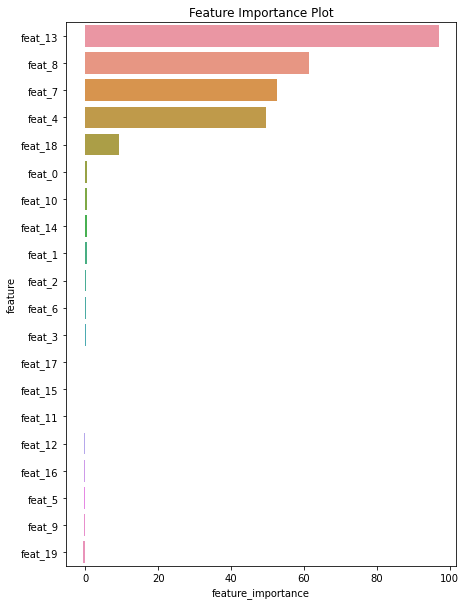

In [30]:
_ = plt.figure(figsize=(7, 10))
_ = sns.barplot(data=feature_importance_df, x="feature_importance", y="feature")
_ = plt.title("Feature Importance Plot")
# _ = plt.savefig(f"images/feature_importances_all.png", dpi=400, bbox_inches="tight")

## Plot the original data and the lines of best fit for each of the predictors on the target

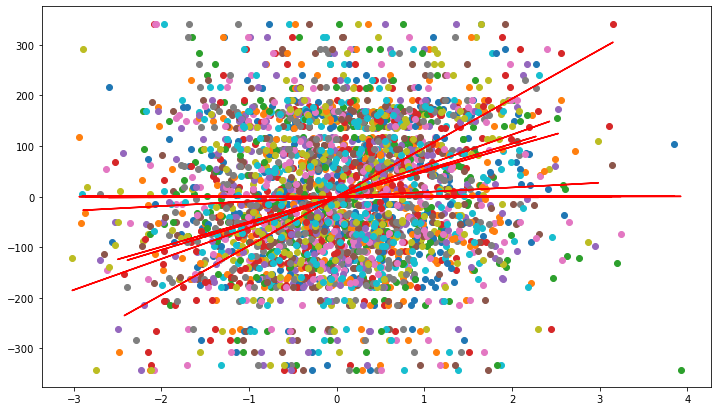

In [31]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(df_train.filter(regex="feat"), 
             df_train["target"], 
             'o', 
             label='original data')
_ = plt.plot(df_train.filter(regex="feat"), 
             intercept + coefs*df_train.filter(regex="feat"), 
             'r', 
             label='fitted line')
# _ = plt.legend()

## With the fitted model attempt to predict the test data

In [32]:
y_pred = optimized_reg.predict(df_test.filter(regex="feat"))
y_pred.head(2)

,y_pred
10,293.206902
18,-82.047650


In [33]:
y_test = df_test[["target"]]
y_test.head(2)

,target
10,294.522357
18,-80.495733


## Calculate the r2 between the predicted vs the real scores

In [34]:
r_sq = r2_score(y_test["target"], 
        y_pred)
r_sq

0.9992335993856171

## Plot the predicted vs the real values

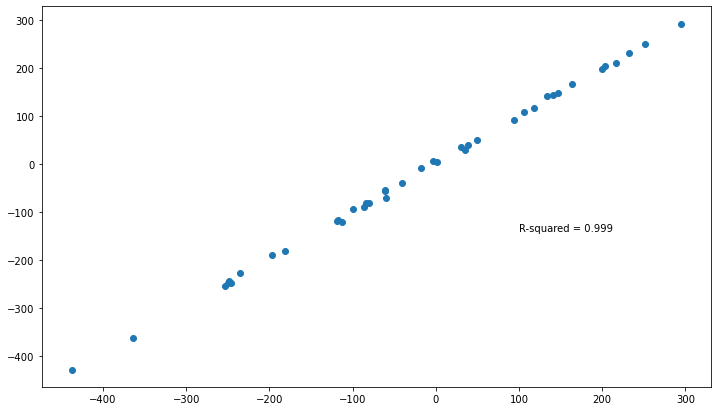

In [35]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(y_test["target"], 
             y_pred, 
             'o', 
#              label='original data'
            )
_ = plt.annotate(text = f"R-squared = {round(r_sq, 3)}",
                 xy=(100, -140),)